In [219]:
#Load a data set 
import sklearn
from sklearn import datasets
import pandas as pd
import numpy as np
import warnings
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [220]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('titanic')


In [221]:
df.head(20)
df.tail(10)
len(df)

891

In [222]:
df = sns.load_dataset('titanic')
# Dataframe is created by the selected features
#df = df[['pclass','sex','age','fare','embark_town','survived']]
# vectorize the categorical variables
df = pd.get_dummies(df)
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   age                      714 non-null    float64
 3   sibsp                    891 non-null    int64  
 4   parch                    891 non-null    int64  
 5   fare                     891 non-null    float64
 6   adult_male               891 non-null    bool   
 7   alone                    891 non-null    bool   
 8   sex_female               891 non-null    uint8  
 9   sex_male                 891 non-null    uint8  
 10  embarked_C               891 non-null    uint8  
 11  embarked_Q               891 non-null    uint8  
 12  embarked_S               891 non-null    uint8  
 13  class_First              891 non-null    uint8  
 14  class_Second             8

In [223]:
#change the column type with the astype method. 
#Let’s apply this method to the fare(float) and age(float) features to convert it into int64:
df['fare'] = df['fare'].astype('int64')
df['age']=df['fare'].astype('int64')
print(df.dtypes)

survived                   int64
pclass                     int64
age                        int64
sibsp                      int64
parch                      int64
fare                       int64
adult_male                  bool
alone                       bool
sex_female                 uint8
sex_male                   uint8
embarked_C                 uint8
embarked_Q                 uint8
embarked_S                 uint8
class_First                uint8
class_Second               uint8
class_Third                uint8
who_child                  uint8
who_man                    uint8
who_woman                  uint8
deck_A                     uint8
deck_B                     uint8
deck_C                     uint8
deck_D                     uint8
deck_E                     uint8
deck_F                     uint8
deck_G                     uint8
embark_town_Cherbourg      uint8
embark_town_Queenstown     uint8
embark_town_Southampton    uint8
alive_no                   uint8
alive_yes 

In [224]:
# split dataset into inputs and outputs-(dataset.values is an array)
values = df.values
x = values[:,0:8]
y = values[:,8]
#print(x)
#print(y)
y = y.astype ('int')

In [225]:
#SPLIT DATA INTO TRAIN AND TEST
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#x, y = make_classification(random_state=0)
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
len(x_train)

668

In [226]:
#Set up ML pipeline
#impute missing values
#standardise data
#use single value of knn
# Now since everything is numerical,we can use the numerical imputing methods to fill in the mean for missing values

from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
model = Pipeline([('Imputation',SimpleImputer(strategy='mean')),('scaler', StandardScaler()),('knn', knn)])
model.fit(x_train,y_train)
#model.score(x_train,y_train)
from sklearn.metrics import accuracy_score
y_model = model.predict(x_test)
print(accuracy_score(y_test, y_model))

0.9596412556053812


In [227]:
#Testing k on 3 values-small value of k, a medium value, and a large value 
#kvalues to be tested=[10,150,600]
n_neighbours = [10,150,600]
scores={}
scores_list=[]
for k in n_neighbours:
    #print(k)
    knn = KNeighborsClassifier(k)
    model = Pipeline([('Imputation',SimpleImputer(strategy='mean')),('scaler', StandardScaler()),('knn', knn)])
    model.fit(x_train,y_train)
    model.fit(x_train,y_train)
    scores[k]=model.score(x_train,y_train)
    scores_list.append(scores[k])
print (scores_list) 

[0.9505988023952096, 0.9251497005988024, 0.6541916167664671]


In [228]:
#Which of these three k values worked the best?  
#Based on your knowledge of the data (either through background intuition,or exploratory data analysis,
#or any other insight you have) try to explain why you think that choice of k was better than the others (you don't need a detailed explanation, just give it some thought and try to explain your idea here).
''' The best value of k in this data set is when k=10.
The process of choosing the right value of K is referred to as parameter tuning and is of great significance in achieving 
better accuracy.If the value of K is too small then there is a probability of overfitting the model and if it is too large then the 
algorithm becomes computationally expensive.'''

' The best value of k in this data set is when k=10.\nThe process of choosing the right value of K is referred to as parameter tuning and is of great significance in achieving \nbetter accuracy.If the value of K is too small then there is a probability of overfitting the model and if it is too large then the \nalgorithm becomes computationally expensive.'

Minimum error:- 0.14798206278026907 at K = 0


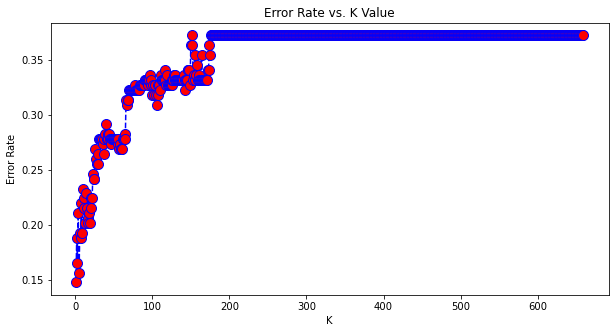

In [229]:
#This graph is just to check the accuracy ...


import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
error_rate = []
for i in range(1,660):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,5))
plt.plot(range(1,660),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.852017937219731 at K = 0


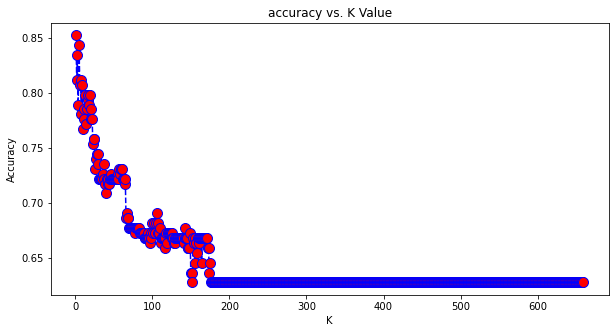

In [231]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,660):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,5))
plt.plot(range(1,660),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))